# Working with Categorical Data in Python

## Introduction to Categorical Data

In [19]:
import pandas as pd

In [20]:
adult = pd.read_csv('adult.csv')

In [21]:
adult.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:

print(adult['Above/Below 50k'].describe())

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object


In [23]:

print(adult['Above/Below 50k'].value_counts())

 <=50K    24720
 >50K      7841
Name: Above/Below 50k, dtype: int64


In [24]:
print(adult['Above/Below 50k'].value_counts(normalize=True))

 <=50K    0.75919
 >50K     0.24081
Name: Above/Below 50k, dtype: float64


### Setting dtypes and saving memory

In [25]:
adult['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [26]:
list_of_occupations = adult['Occupation'].values.tolist()

In [27]:
series1 = pd.Series(list_of_occupations)

In [28]:

print("series1 data type:", series1.dtype)
print("series1 number of bytes:", series1.nbytes)

series1 data type: object
series1 number of bytes: 260488


In [29]:

series2 = pd.Series(list_of_occupations, dtype="category")

In [30]:
print("series2 data type:", series2.dtype)
print("series2 number of bytes:", series2.nbytes)

series2 data type: category
series2 number of bytes: 32681


### Creating a categorical pandas Series

In [31]:
medal_won = pd.read_csv('medals_won.txt')

In [32]:

medals = pd.Categorical(medal_won, categories=['Bronze', 'Silver', 'Gold'], ordered=True)
print(medals)

['Silver']
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']


### Setting dtype when reading data


In [33]:
adult.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
print(adult.dtypes)

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object


In [35]:
adult_dtypes = {
   "Workclass": "category",
   "Education": "category",
   "Relationship": "category",
   "Above/Below 50k": "category" 
}

In [36]:
adult2 = pd.read_csv(
  "adult.csv",
  dtype=adult_dtypes
)
print(adult2.dtypes)

Age                   int64
Workclass          category
fnlgwt                int64
Education          category
Education Num         int64
Marital Status       object
Occupation           object
Relationship       category
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k    category
dtype: object


### Setting up a .groupby() statement

In [37]:
gb = adult.groupby(by=['Sex', 'Above/Below 50k'])


print(gb.size())


print(gb.mean())

Sex      Above/Below 50k
 Female   <=50K              9592
          >50K               1179
 Male     <=50K             15128
          >50K               6662
dtype: int64
                               Age         fnlgwt  Education Num  \
Sex     Above/Below 50k                                            
 Female  <=50K           36.210801  185999.381359       9.820475   
         >50K            42.125530  183687.406277      11.787108   
 Male    <=50K           37.147012  193093.609268       9.452142   
         >50K            44.625788  188769.101321      11.580606   

                         Capital Gain  Capital Loss  Hours/Week  
Sex     Above/Below 50k                                          
 Female  <=50K             121.986134     47.364470   35.916701  
         >50K             4200.389313    173.648855   40.426633  
 Male    <=50K             165.723823     56.806782   40.693879  
         >50K             3971.765836    198.780396   46.366106  


### Using pandas functions effectively

In [38]:

user_list = ['Education', 'Above/Below 50k']


gb = adult.groupby(by=user_list)


print(gb['Hours/Week'].mean())

Education      Above/Below 50k
 10th           <=50K             36.574053
                >50K              43.774194
 11th           <=50K             33.322870
                >50K              45.133333
 12th           <=50K             35.035000
                >50K              44.818182
 1st-4th        <=50K             37.864198
                >50K              48.833333
 5th-6th        <=50K             38.539432
                >50K              46.000000
 7th-8th        <=50K             38.830033
                >50K              47.500000
 9th            <=50K             37.667351
                >50K              44.851852
 Assoc-acdm     <=50K             39.264339
                >50K              44.256604
 Assoc-voc      <=50K             40.817826
                >50K              43.853186
 Bachelors      <=50K             40.586152
                >50K              45.475462
 Doctorate      <=50K             45.429907
                >50K              47.513072
 

## Categorical pandas Series


In [39]:
dogs = pd.read_csv('ShelterDogs.csv')

In [40]:
print(dogs["keep_in"].value_counts(dropna=False))

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64


In [41]:
dogs["keep_in"] = dogs["keep_in"].astype('category')

In [42]:
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories)

In [43]:
print(dogs["keep_in"].value_counts(dropna=False))

both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Unknown History               0
Open Yard (Countryside)       0
Name: keep_in, dtype: int64


### Removing categories

In [44]:
dogs["likes_children"] = dogs["likes_children"].astype("category")

In [45]:
dogs["likes_children"] = dogs["likes_children"].cat.add_categories(  new_categories=["maybe"])

In [46]:
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"

In [47]:

print(dogs["likes_children"].cat.categories)

Index(['no', 'yes', 'maybe'], dtype='object')


In [48]:

print(dogs["likes_children"].value_counts())

yes      1172
no         47
maybe       0
Name: likes_children, dtype: int64


In [49]:
dogs["likes_children"] = dogs["likes_children"].cat.remove_categories(["maybe"])
print(dogs["likes_children"].value_counts())

yes    1172
no       47
Name: likes_children, dtype: int64


In [50]:
print(dogs["likes_children"].cat.categories)

Index(['no', 'yes'], dtype='object')


### Renaming categories

In [51]:

my_changes = {"Maybe?": "Maybe"}


dogs["likes_children"] = dogs["likes_children"].cat.rename_categories(my_changes)


dogs["likes_children"] =  dogs["likes_children"].cat.rename_categories(lambda c: c.upper())


print(dogs["likes_children"].cat.categories)

Index(['NO', 'YES'], dtype='object')


### Collapsing categories

In [52]:

update_coats = {"wirehaired": "medium", "medium-long": "medium"}


dogs["coat_collapsed"] = dogs["coat"].replace(update_coats)


dogs["coat_collapsed"] = dogs["coat_collapsed"].astype('category')


print(dogs["coat_collapsed"].value_counts())

short     1972
medium     785
long       180
Name: coat_collapsed, dtype: int64


### Reordering categories in a Series

In [53]:
dogs["size"] = dogs["size"].astype("category")

In [54]:

print(dogs["size"].cat.categories)

Index(['large', 'medium', 'small'], dtype='object')


In [55]:

dogs["size"] = dogs["size"].cat.reorder_categories(
    new_categories=["small", "medium", "large"]
)

In [56]:

dogs["size"] = dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True
)

In [57]:

dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace=True
)

/Users/Hakan.Ozler/Desktop/notebooks/datacamp/Working with Categorical Data in Python/venv/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


### Using .groupby() after reordering

In [58]:

dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace=True
)


print(dogs.groupby("size")["sex"].value_counts())


print(dogs.groupby("size")["keep_in"].value_counts(normalize=True))

size    sex   
small   male       260
        female     214
medium  male      1090
        female     854
large   male       331
        female     188
Name: sex, dtype: int64
size                           
small   both flat and garden       0.702065
        flat                       0.235988
        garden                     0.061947
        Unknown History            0.000000
        Open Yard (Countryside)    0.000000
medium  both flat and garden       0.657568
        garden                     0.262200
        flat                       0.080232
        Unknown History            0.000000
        Open Yard (Countryside)    0.000000
large   both flat and garden       0.519022
        garden                     0.467391
        flat                       0.013587
        Unknown History            0.000000
        Open Yard (Countryside)    0.000000
Name: keep_in, dtype: float64


/Users/Hakan.Ozler/Desktop/notebooks/datacamp/Working with Categorical Data in Python/venv/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


### Cleaning variables

In [59]:

replace_map = {"Malez": "male"}


dogs["sex"] = dogs["sex"].replace(replace_map)


dogs["sex"] = dogs["sex"].str.strip()


dogs["sex"] = dogs["sex"].str.lower()


dogs["sex"] = dogs["sex"].astype('category')

print(dogs["sex"].value_counts())

male      1681
female    1256
Name: sex, dtype: int64


### Accessing and filtering data

In [60]:
dogs.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,coat_collapsed
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,YES,yes,yes,yes,NaN,short
2,23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short
3,23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short


In [61]:
dogs['coat'] = dogs['coat'].astype('category')

In [62]:

print(dogs.loc[dogs['ID'] == 23807, "coat"])

0    short
Name: coat, dtype: category
Categories (4, object): ['long', 'medium', 'short', 'wirehaired']


In [63]:

print(dogs.loc[dogs['coat'] == 'long', "sex"].value_counts())

male      124
female     56
Name: sex, dtype: int64


In [64]:

print(dogs.loc[dogs['breed'] == "English Cocker Spaniel", "age"].mean())

8.186153846153847


In [65]:

print(dogs[dogs["breed"].str.contains('English', regex=False)].shape[0])

35


## Visualizing Categorical Data

In [66]:
import seaborn as sns

In [67]:
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('lasvegas_tripadvisor.csv')

In [69]:
df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


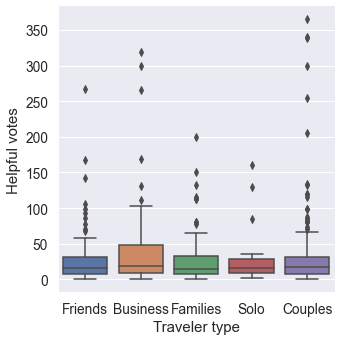

In [70]:

sns.set(font_scale=1.25)


sns.set_style("darkgrid")


sns.catplot(x='Traveler type', y='Helpful votes', kind='box', data=df)

plt.show()

### Creating a bar plot

Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: Period of stay, dtype: int64


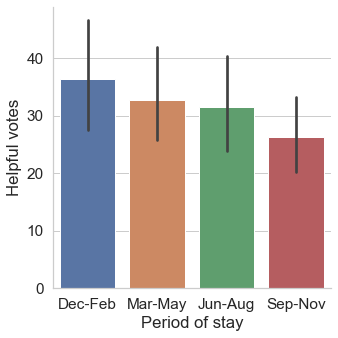

In [71]:

print(df['Period of stay'].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")


sns.catplot(x='Period of stay', y='Helpful votes', kind='bar', data=df)
plt.show()

### Ordering categories

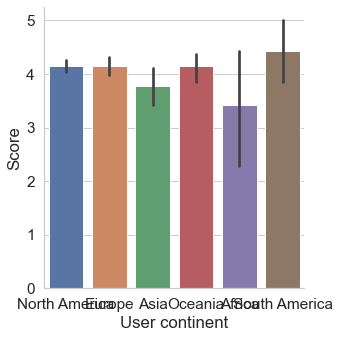

In [72]:

sns.catplot(x='User continent', y='Score', data=df, kind='bar')
plt.show()

In [73]:

print(df['User continent'].value_counts())

North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: User continent, dtype: int64


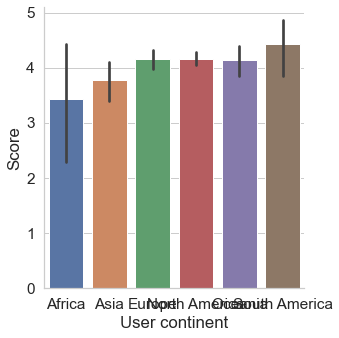

In [74]:

df["User continent"] = df["User continent"].astype('category')
sns.catplot(x='User continent', y="Score", data=df, kind="bar")
plt.show()

In [75]:
df["User continent"].value_counts()

North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: User continent, dtype: int64

In [76]:
df["User continent"]

0      North America
1      North America
2      North America
3             Europe
4      North America
           ...      
499           Europe
500    North America
501    North America
502    North America
503    North America
Name: User continent, Length: 504, dtype: category
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

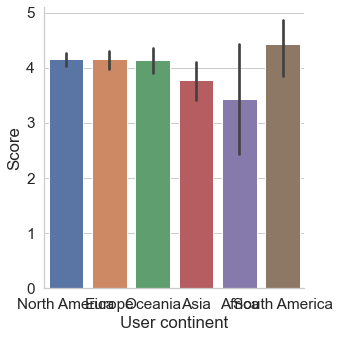

In [77]:

continent_categories = list(df["User continent"].value_counts().index)

df["User continent"] = df["User continent"].cat.reorder_categories(new_categories=continent_categories)

sns.catplot(x="User continent", y="Score", data=df, kind="bar")
plt.show()

### Bar plot using hue

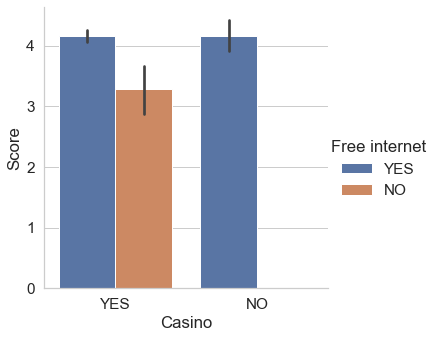

In [78]:


sns.catplot(x='Casino', y="Score", data=df, kind="bar", hue='Free internet')
plt.show()

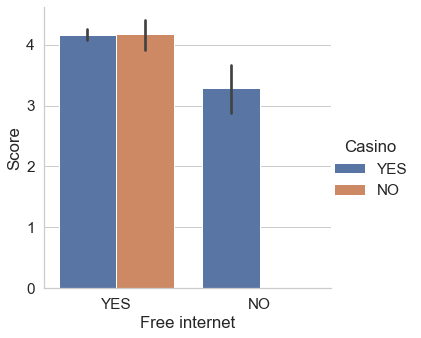

In [79]:

sns.catplot(x='Free internet', y="Score", data=df, kind="bar", hue='Casino')
plt.show()

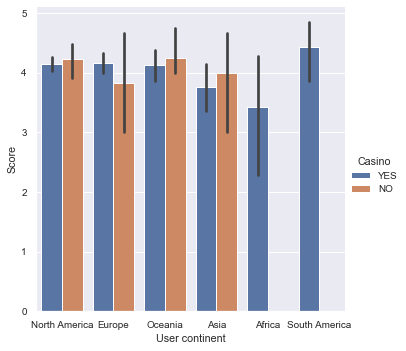

In [80]:
sns.set(font_scale=0.9)
sns.catplot(x='User continent', y="Score", data=df, kind="bar", hue="Casino")
plt.show()

### Creating a point plot

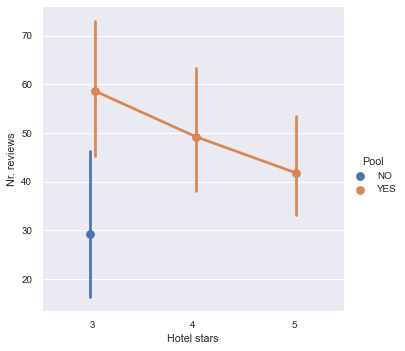

In [81]:

sns.catplot(
  
  x='Hotel stars',
  y='Nr. reviews',
  data=df,
  
  kind='point',
  hue="Pool",
  
  dodge=True
)
plt.show()

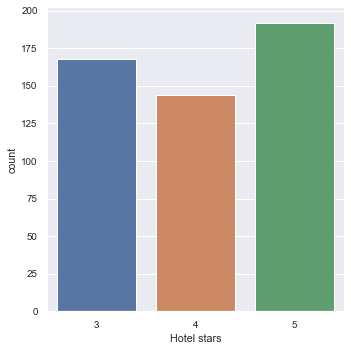

In [82]:
sns.catplot(
    x='Hotel stars',
    kind='count',
    data=df
)

### Creating a count plot

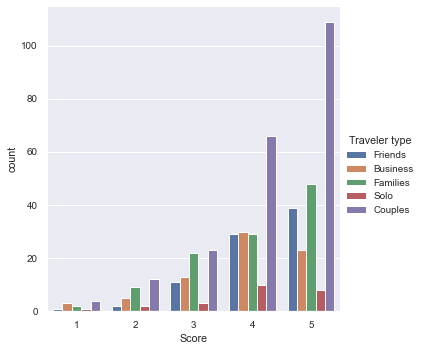

In [83]:

sns.catplot(
  x='Score',
  kind='count',
  hue='Traveler type',
  data=df
)
plt.show()

1. a graphical form of a frequency table. count 
2. has the parameters, join and dodge, which can update the look of the lines in the plot. point
3. can be used to see the distribution and outliers of a numeric column. box
4. is similar to a point plot and can be used to see the central tendency of numerical data. bar

### One visualization per group

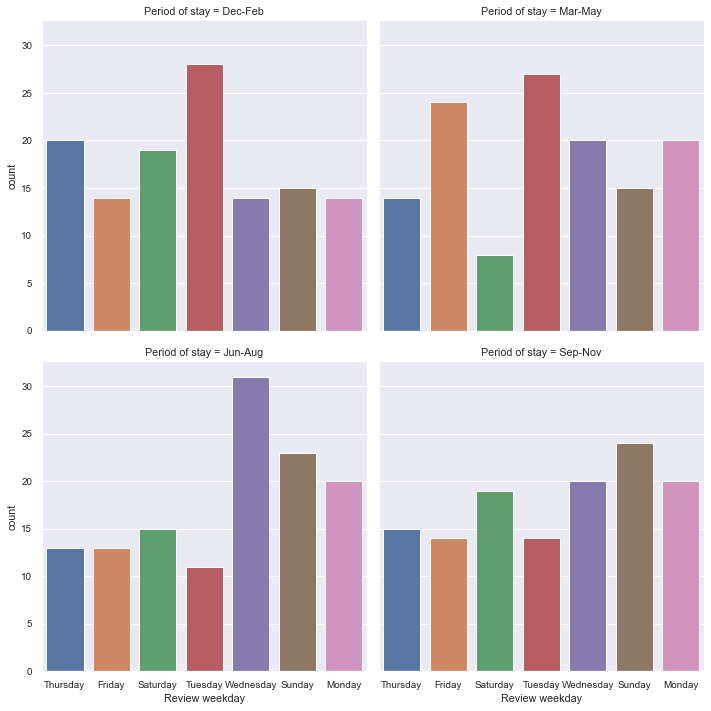

In [84]:

ax = sns.catplot(
  
  x='Review weekday',
  
  col='Period of stay',
  
  kind='count',
  
  col_wrap=2,
  data=df
)
plt.show()

### Updating categorical plots

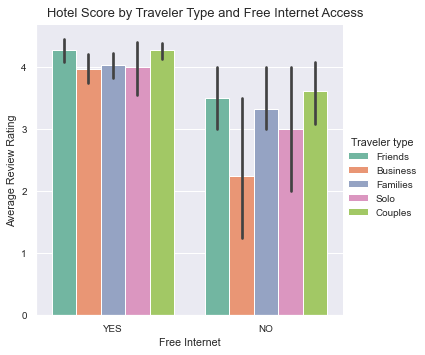

In [85]:

ax = sns.catplot(
    x="Free internet", 
    y="Score",
    hue="Traveler type", 
    kind="bar",
    data=df,
    palette=sns.color_palette("Set2")
)


ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")

ax.set_axis_labels("Free Internet", "Average Review Rating")


plt.subplots_adjust(top=0.93)
plt.show()

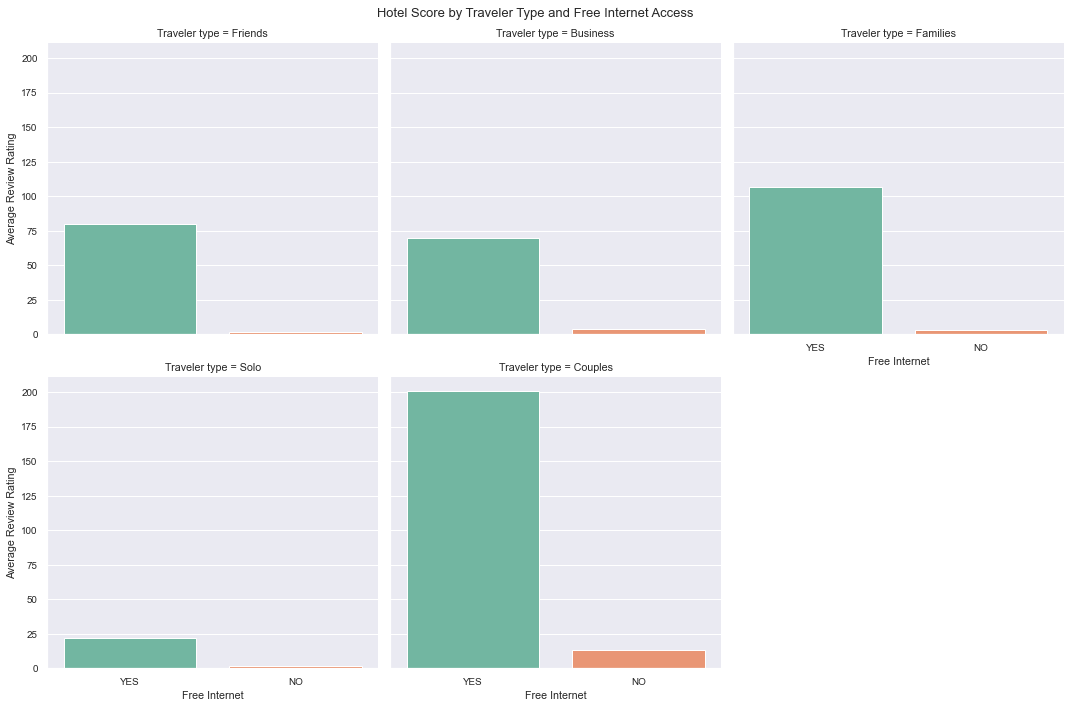

In [86]:

ax = sns.catplot(
    col="Traveler type",
    x="Free internet", 
    kind="count",
    data=df,
    palette=sns.color_palette("Set2"),
    col_wrap=3
)


ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")

ax.set_axis_labels("Free Internet", "Average Review Rating")


plt.subplots_adjust(top=0.93)
plt.show()

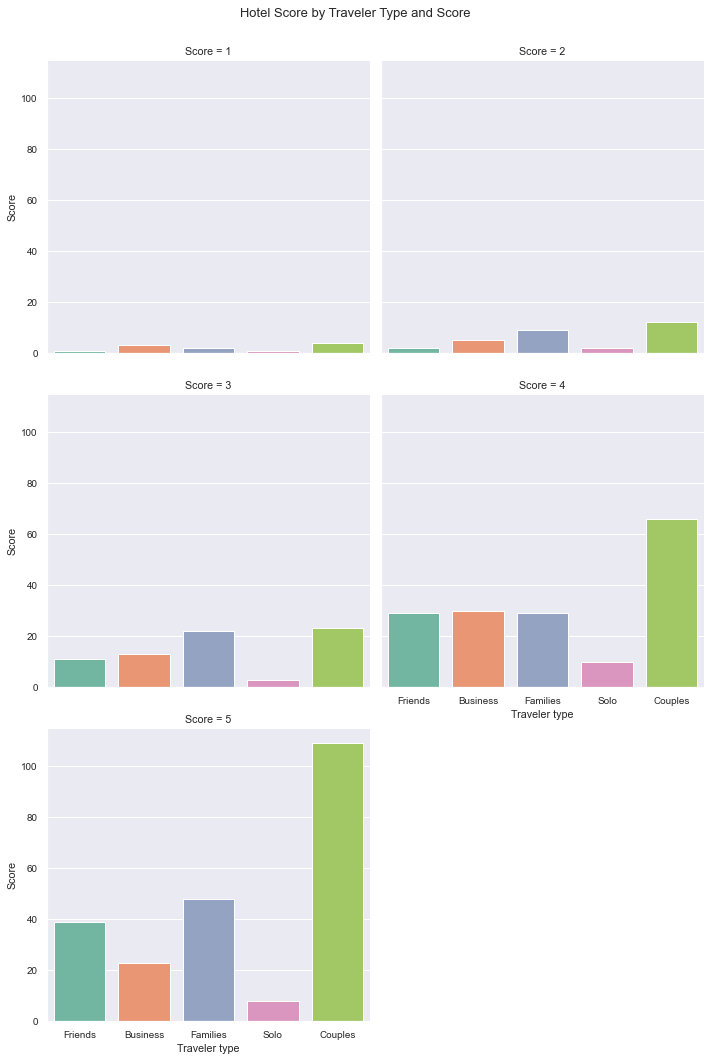

In [87]:

ax = sns.catplot(
    col="Score",
    x="Traveler type", 
    kind="count",
    data=df,
    palette=sns.color_palette("Set2"),
    col_wrap=2
)


ax.fig.suptitle("Hotel Score by Traveler Type and Score")

ax.set_axis_labels("Traveler type", "Score")


plt.subplots_adjust(top=0.93)
plt.show()

## Pitfalls and Encoding

### Overcoming pitfalls: string issues

In [131]:
used_cars = pd.read_csv('cars.csv')

In [132]:

print(used_cars["body_type"].value_counts(dropna=False))


used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other"


used_cars["body_type"] = used_cars["body_type"].str.title()


print(used_cars["body_type"].dtype)

sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64
object


### Create a label encoding and map

In [133]:

used_cars["color"] = used_cars["color"].astype("category")
print(used_cars["color"].value_counts())


used_cars["color_code"] = used_cars["color"].cat.codes


codes = used_cars["color"].cat.codes
categories = used_cars["color"]
color_map = dict(zip(codes, categories))


print(color_map)

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64
{8: 'silver', 1: 'blue', 7: 'red', 0: 'black', 4: 'grey', 6: 'other', 2: 'brown', 10: 'white', 3: 'green', 9: 'violet', 5: 'orange', 11: 'yellow'}


### Using saved mappings

In [134]:
fuel_map = dict(zip(used_cars["engine_fuel"].astype("category").cat.codes, used_cars["engine_fuel"].astype("category")))
transmission_map = dict(zip(used_cars["transmission"].astype("category").cat.codes, used_cars["transmission"].astype("category")))

In [135]:
fuel_map

{3: 'gasoline',
 2: 'gas',
 0: 'diesel',
 5: 'hybrid-petrol',
 4: 'hybrid-diesel',
 1: 'electric'}

In [136]:
transmission_map

{0: 'automatic', 1: 'mechanical'}

In [137]:

used_cars["color"] = used_cars['color'].cat.codes.map(color_map)

used_cars["engine_fuel"] = used_cars['engine_fuel'].astype("category")
used_cars["engine_fuel"] = used_cars["engine_fuel"].cat.codes
used_cars["engine_fuel"] = used_cars["engine_fuel"].map(fuel_map)

used_cars["transmission"] = used_cars['transmission'].astype("category")
used_cars["transmission"] = used_cars["transmission"].cat.codes
used_cars["transmission"] = used_cars['transmission'].map(transmission_map)


print(used_cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

### Creating a Boolean encoding

In [139]:
import numpy as np

In [140]:

print(used_cars["manufacturer_name"].value_counts())


used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0
)
  

print(used_cars["is_volkswagen"].value_counts())

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

### One-hot encoding specific columns

In [141]:

used_cars_simple = pd.get_dummies(
  used_cars,
  
  columns=["manufacturer_name", 'transmission'],
  
  prefix="dummy"
)


print(used_cars_simple.shape)

(38531, 87)
